# Design - The Qmod Language

The first step in quantum software development is to design your software and your algorithm. Classiq features a unique high-level modeling language called Qmod that naturally captures the core concepts of quantum algorithm design. There are two ways to design in Qmod:
* Directly, via the Classiq IDE using the Qmod native syntax
* With the Classiq Python SDK package, which gives access to the Qmod language via Python

Once you finish designing your algorithm, you send it to the Classiq synthesis engine (compiler) to create a concrete quantum circuit implementation - a quantum program.

## Concrete Example 

First, understand Qmod through an example. 

The task is to design a quantum algorithm that coherently computes the arithmetic operation $y=x^2+1$, for a quantum variable $|x\rangle$ that is a superposition of all the numbers between $0$ and $7$:
$\begin{equation}
|x\rangle = \frac{1}{\sqrt{8}}(|0\rangle+|1\rangle+\dots +|7\rangle.
\end{equation}$
The expected output is 

$\begin{equation}
|x\rangle |y\rangle = |x\rangle |x^2+1\rangle = \frac{1}{\sqrt{8}}\sum_{i=0}^{7}|i\rangle|i^2+1\rangle,
\end{equation}$
where $|x\rangle$ is entangled to $|y\rangle$.


This may sound complicated, but the following few lines of code in Qmod create the desired algorithm with Classiq:

In [1]:
from classiq import *


@qfunc
def main(x: Output[QNum], y: Output[QNum]):

    allocate(3, x)
    hadamard_transform(x)  # creates a uniform superposition
    y |= x**2 + 1

Synthesize and view the quantum program:

In [2]:
quantum_program = synthesize(create_model(main))
show(quantum_program)

<div  style="text-align:center;">
    <img src="https://docs.classiq.io/resources/design.gif">
</div>

## Key Qmod Principles

The above code is a quantum model written in Qmod. A model is composed of quantum functions with at least one quantum function called `main`. Define quantum functions in Python using regular Python functions decorated with `@qfunc`, and in the native Qmod syntax define them with the `qfunc` keyword.  

Quantum functions manipulate quantum objects that are represented using quantum variables. Declare and initialize each variable before it is used. 

The following points explain the principles:

<u>**1) Include a `qfunc` decorator in Python or keyword in the native syntax**</u>

You can see the `qfunc` decorator (`@qfunc`) in the Python implementation and the corresponding keyword in the native implementation. This indicates to Qmod that we are dealing with quantum functions that manipulate quantum objects. 

<u>**2) Include a `main` function**</u>

Every quantum algorithm written in Qmod must have a `main` function. From this `main` function, create the quantum program using the `synthesize(create_model(main))` command in Python or by clicking Synthesis in the IDE.

<u>**3) Declare the arguments of the `main` function as `output`s**</u>

In the above example, the two arguments of the `main` function—`x` and `y`—are both quantum variables. Their type is `QNum`(`qnum` in the native syntax), which announces a quantum number (see [Quantum Variables](../quantum_variables_and_functions/quantum_variables_and_functions.ipynb)). In addition to the type, declare the variables of the `main` function as `output`, indicating that these quantum variables are not initialized outside the scope of the function.
<details> 
<summary> Types of Quantum Variables </summary>
Qmod has these types of quantum variables:

* `QBit` (`qbit`)
* `QArray[QBit]` (`qbit[]`)
* `QNum` (`qnum`)
</details>


<u>**4) Declare each quantum variable before using it**</u>

You can declare the variables `x` and `y` as arguments of the `main` function or in the scope of a function (see [Quantum Variables](../quantum_variables_and_functions/quantum_variables_and_functions.ipynb)).
<details> 
<summary> Declaration Within the Scope of a Function </summary>
You can declare a quantum variable within the scope of a function with 

=== Python
        x = QNum('x')

=== Native
        x:qnum;

</details>

<u>**5) Initialize each quantum variable**</u>

After declaring a quantum variable, initialize it using one of several ways. Two are shown in the example above:

* `x` is initialized with the `allocate` operation.
* `y` is initialized with the `|=` (`=` in native) numeric assignment.

<details> 
<summary> Types of Initializations </summary>
Ways to initialize a quantum variable:

* With `allocate` or `allocate_num` 
* With `prepare_state` or `prepare_amplitudes`
* With [numerical assignment](https://docs.classiq.io/latest/qmod-reference/language-reference/statements/numeric-assignment/) 
* As the result of a numeric operation, as in the example above
* With the `bind` operation (`->` in native)
* With any function that declares its quantum variable argument as `output`

</details>

## Verify Your Understanding - Recommended Exercise

Write within the IDE with the native Qmod syntax a quantum algorithm that coherently calculates $y=2x+4z+2$ where $x$ and $z$ are  quantum numbers represented with 5 qubits each, and they are initialized in a superposition of all possible values.

In [5]:
from classiq import *


@qfunc
def main(x: Output[QNum], z: Output[QNum], y: Output[QNum]):

    allocate(3, x)
    allocate(5, z)
    hadamard_transform(x)  # creates a uniform superposition
    hadamard_transform(z) 
    y |= 2*x + 4*z + 2

In [6]:
quantum_program = synthesize(create_model(main))
show(quantum_program)

Opening: https://platform.classiq.io/circuit/6f8719b5-a789-4525-9eca-09a04092e09d?version=0.62.0


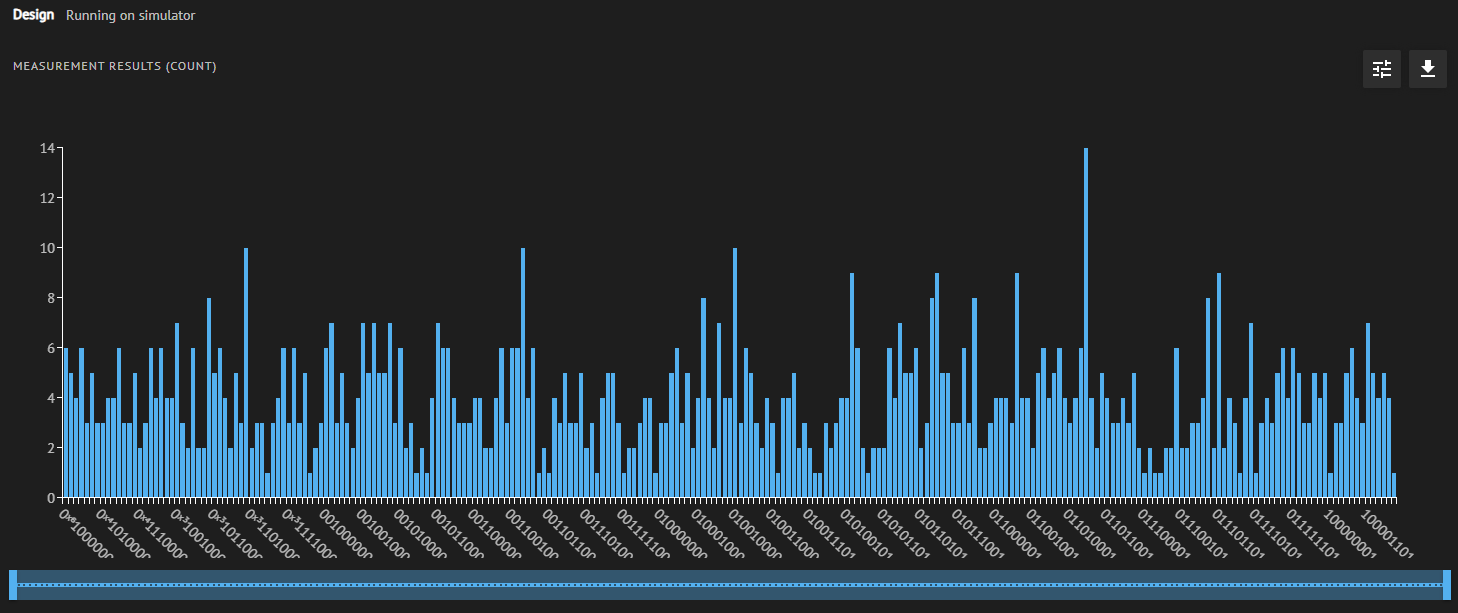

## Next Steps
Now that you are familiar with the foundations of Qmod, you can continue with
* Quantum Variables and Functions
* Quantum Operations
* Classical Control Flow

In [3]:
write_qmod(create_model(main), "design")